<a href="https://colab.research.google.com/github/rahakaushik/quant_finance/blob/main/Pair_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress



[*********************100%***********************]  2 of 2 completed


In [22]:
# Download stock data from Yahoo Finance
start_date = "2022-01-01"
tickers = ["GOOG", "JPM"]

data = yf.download(tickers, start=start_date)["Close"]

data.dropna(inplace=True)

[*********************100%***********************]  2 of 2 completed


In [25]:
start_date = "2022-01-01"
tickers = ["GOOG", "JPM"]

data = yf.download(tickers, start=start_date)

# Compute Median for each stock
data["GOOG_Median"] = data.loc[:, ("Open", "GOOG")].add(
    data.loc[:, ("High", "GOOG")]
).add(
    data.loc[:, ("Low", "GOOG")]
).add(
    data.loc[:, ("Close", "GOOG")]
).div(4)

data["JPM_Median"] = data.loc[:, ("Open", "JPM")].add(
    data.loc[:, ("High", "JPM")]
).add(
    data.loc[:, ("Low", "JPM")]
).add(
    data.loc[:, ("Close", "JPM")]
).div(4)

# Drop any missing values
median_data = data[["GOOG_Median", "JPM_Median"]].dropna()

[*********************100%***********************]  2 of 2 completed


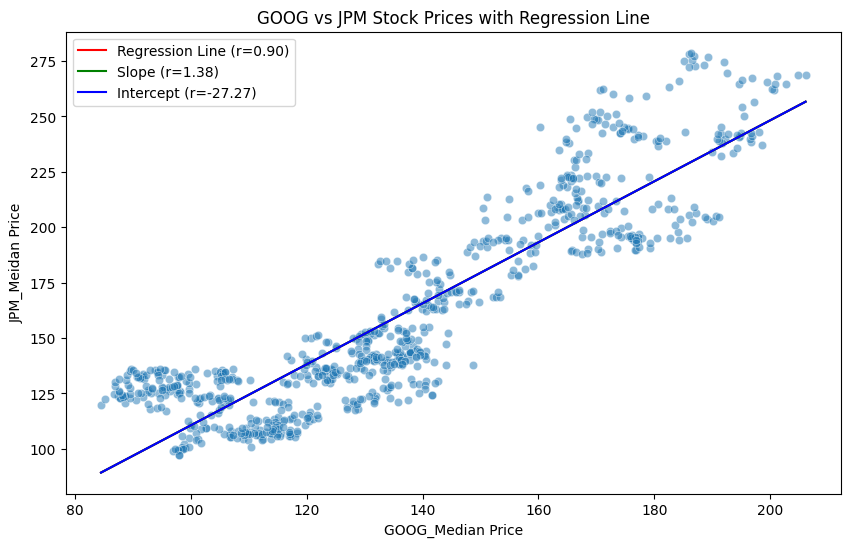

In [26]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["GOOG_Median"], y=data["JPM_Median"], alpha=0.5)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(data["GOOG_Median"], data["JPM_Median"])
x_vals = np.linspace(data["GOOG_Median"].min(), data["GOOG_Median"].max(), 100)
y_vals = slope * x_vals + intercept

# Plot regression line
plt.plot(x_vals, y_vals, color='red', label=f"Regression Line (r={r_value:.2f})")
plt.plot(x_vals, y_vals, color='green', label=f"Slope (r={slope:.2f})")
plt.plot(x_vals, y_vals, color='blue', label=f"Intercept (r={intercept:.2f})")

# Labels and title
plt.xlabel("GOOG_Median Price")
plt.ylabel("JPM_Meidan Price")
plt.title("GOOG vs JPM Stock Prices with Regression Line")
plt.legend()
plt.show()